In [ ]:
#dataset link :https://www.kaggle.com/datasets/yyxian/u-s-airline-traffic-data/code

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.tree import DecisionTreeRegressor
#arima is done
#ExponentialSmoothing is done
#Linear Regression isn't done
#

In [ ]:
df = pd.read_csv('./datasets/air traffic (1).csv')
df

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,5,"71,423,653","10,358,666","81,782,319","667,331","71,924","739,255","66,743,565","26,805,432","93,548,998","77,821,407","31,950,687","109,772,094",85.77,83.90,85.22
245,2023,6,"72,482,621","11,544,505","84,027,126","661,293","75,279","736,572","68,789,127","29,883,465","98,672,591","78,058,358","33,410,671","111,469,028",88.13,89.44,88.52
246,2023,7,"75,378,157","12,432,615","87,810,772","684,939","79,738","764,677","72,267,904","31,376,000","103,643,904","81,986,010","35,326,191","117,312,202",88.15,88.82,88.35
247,2023,8,"71,477,988","11,572,149","83,050,137","691,482","77,137","768,619","67,933,484","29,938,507","97,871,992","81,997,399","34,908,793","116,906,192",82.85,85.76,83.72


In [ ]:
df.head(5)

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07


In [ ]:
df

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,5,"71,423,653","10,358,666","81,782,319","667,331","71,924","739,255","66,743,565","26,805,432","93,548,998","77,821,407","31,950,687","109,772,094",85.77,83.90,85.22
245,2023,6,"72,482,621","11,544,505","84,027,126","661,293","75,279","736,572","68,789,127","29,883,465","98,672,591","78,058,358","33,410,671","111,469,028",88.13,89.44,88.52
246,2023,7,"75,378,157","12,432,615","87,810,772","684,939","79,738","764,677","72,267,904","31,376,000","103,643,904","81,986,010","35,326,191","117,312,202",88.15,88.82,88.35
247,2023,8,"71,477,988","11,572,149","83,050,137","691,482","77,137","768,619","67,933,484","29,938,507","97,871,992","81,997,399","34,908,793","116,906,192",82.85,85.76,83.72


In [ ]:
df.columns

Index(['Year', 'Month', 'Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt',
       'Flt', 'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM', 'ASM',
       'Dom_LF', 'Int_LF', 'LF'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


In [ ]:
  df.describe()


,Year,Month,Dom_LF,Int_LF,LF
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2012.879518,6.445783,79.938394,77.304940,79.286305
std,6.002817,3.442803,8.860562,10.907145,8.895700
min,2003.000000,1.000000,13.090000,23.150000,13.830000
25%,2008.000000,3.000000,77.720000,76.430000,76.940000
50%,2013.000000,6.000000,82.120000,79.910000,81.580000
75%,2018.000000,9.000000,85.240000,82.930000,84.070000
max,2023.000000,12.000000,89.960000,89.440000,89.140000


In [ ]:
duplicated_rows = df[df.duplicated()]

if not duplicated_rows.empty:
    print("There are duplicated rows.")
    print(duplicated_rows)
else:
    print("There are no duplicated rows.")

There are no duplicated rows.


In [ ]:
df.columns

Index(['Year', 'Month', 'Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt',
       'Flt', 'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM', 'ASM',
       'Dom_LF', 'Int_LF', 'LF'],
      dtype='object')

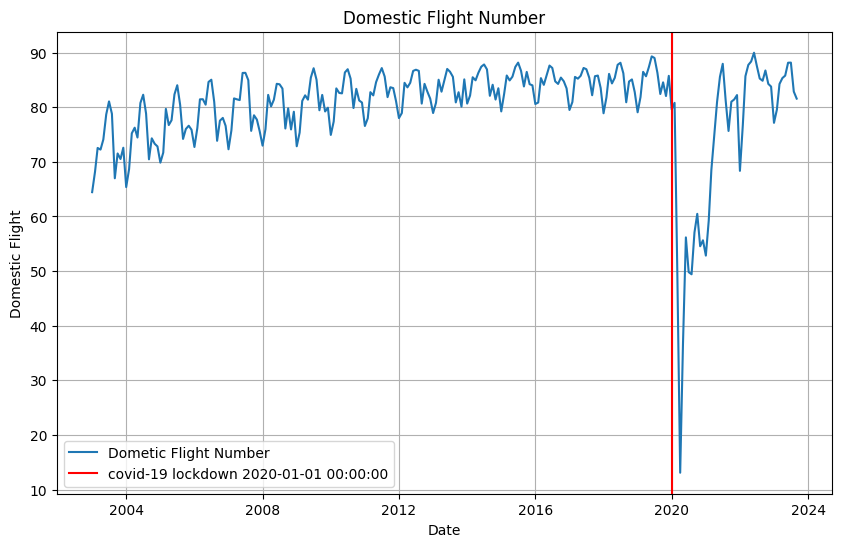

In [ ]:
#create a date column
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

#lockdown start date
lockdown_date = pd.Timestamp('2020-01-01')


#plot with matplotlib
plt.figure(figsize =(10,6))
plt.plot(df['date'],df['Dom_LF'], label ='Dometic Flight Number' )
plt.axvline(lockdown_date, color = 'r', label = f'covid-19 lockdown {lockdown_date}')
plt.title('Domestic Flight Number')
plt.xlabel('Date')
plt.ylabel('Domestic Flight')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# The addition of 0.5 before dividing by 12 suggests a midpoint adjustment.
# This adjustment is often used when working with discrete time intervals, such as months.
# By adding 0.5, we shift the values to the middle of the month before converting to a different time scale (dividing by 12).
df['time'] = (df.index.values + 0.5) / 12




In [ ]:
df

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF,date,time
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20,2003-01-01,0.041667
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31,2003-02-01,0.125000
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12,2003-03-01,0.208333
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02,2003-04-01,0.291667
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07,2003-05-01,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,5,"71,423,653","10,358,666","81,782,319","667,331","71,924","739,255","66,743,565","26,805,432","93,548,998","77,821,407","31,950,687","109,772,094",85.77,83.90,85.22,2023-05-01,20.375000
245,2023,6,"72,482,621","11,544,505","84,027,126","661,293","75,279","736,572","68,789,127","29,883,465","98,672,591","78,058,358","33,410,671","111,469,028",88.13,89.44,88.52,2023-06-01,20.458333
246,2023,7,"75,378,157","12,432,615","87,810,772","684,939","79,738","764,677","72,267,904","31,376,000","103,643,904","81,986,010","35,326,191","117,312,202",88.15,88.82,88.35,2023-07-01,20.541667
247,2023,8,"71,477,988","11,572,149","83,050,137","691,482","77,137","768,619","67,933,484","29,938,507","97,871,992","81,997,399","34,908,793","116,906,192",82.85,85.76,83.72,2023-08-01,20.625000


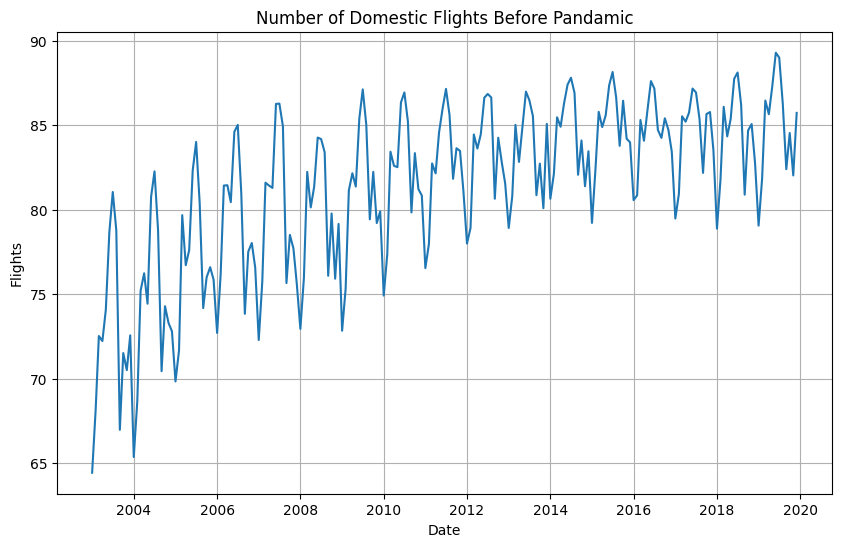

In [ ]:
# create dataframe before lockdown
df_normal_times = df[df['date'] <lockdown_date]

#plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_normal_times['date'], df_normal_times['Dom_LF'])
plt.grid(True)
plt.title('Number of Domestic Flights Before Pandamic')
plt.xlabel('Date')
plt.ylabel('Flights')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Dom_LF   No. Observations:                  249
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -738.528
Date:                Tue, 28 May 2024   AIC                           1489.057
Time:                        17:41:21   BIC                           1510.137
Sample:                    01-01-2003   HQIC                          1497.543
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0951      0.029      3.304      0.001       0.039       0.151
ar.L2         -0.2942      0.054     -5.462      0.000      -0.400      -0.189
ar.L3         -0.0732      0.086     -0.847      0.3

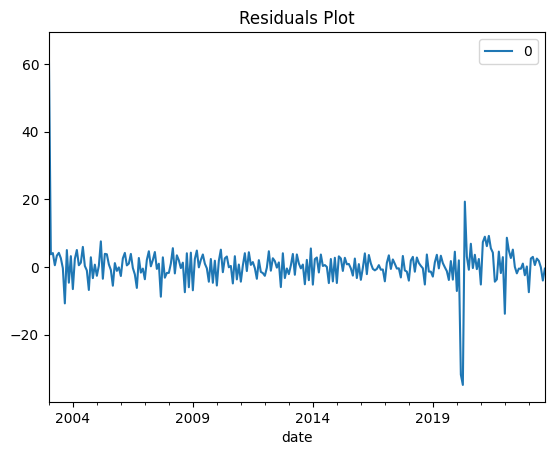

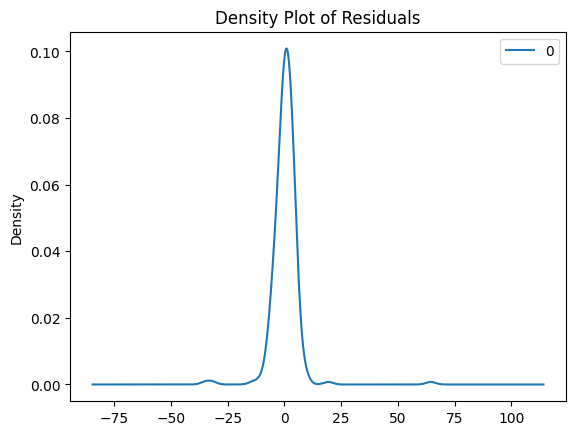

                0
count  249.000000
mean     0.359295
std      6.261150
min    -34.868995
25%     -1.674141
50%      0.504175
75%      2.787896
max     64.440000


In [ ]:

# Create date column
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Set 'date' as index
df.set_index('date', inplace=True)

# Fit ARIMA model
model = ARIMA(df['Dom_LF'], order=(5, 1, 0))
model_fit = model.fit()

# Summary of fitted model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals Plot')
plt.show()

# Density plot of residuals
residuals.plot(kind='kde')
plt.title('Density Plot of Residuals')
plt.show()

# Summary statistics of residuals
print(residuals.describe())


In [ ]:
df

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF,time
date,,,,,,,,,,,,,,,,,,
2003-01-01,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20,0.041667
2003-02-01,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31,0.125000
2003-03-01,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12,0.208333
2003-04-01,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02,0.291667
2003-05-01,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,2023,5,"71,423,653","10,358,666","81,782,319","667,331","71,924","739,255","66,743,565","26,805,432","93,548,998","77,821,407","31,950,687","109,772,094",85.77,83.90,85.22,20.375000
2023-06-01,2023,6,"72,482,621","11,544,505","84,027,126","661,293","75,279","736,572","68,789,127","29,883,465","98,672,591","78,058,358","33,410,671","111,469,028",88.13,89.44,88.52,20.458333
2023-07-01,2023,7,"75,378,157","12,432,615","87,810,772","684,939","79,738","764,677","72,267,904","31,376,000","103,643,904","81,986,010","35,326,191","117,312,202",88.15,88.82,88.35,20.541667


predicted=3.539563, expected=4.798296
predicted=3.913474, expected=5.226888
predicted=4.372151, expected=5.933050
predicted=4.433948, expected=2.391382
predicted=4.565722, expected=2.384169
predicted=3.663418, expected=3.364221
predicted=4.376510, expected=4.069128
predicted=3.756427, expected=4.825664
predicted=4.339451, expected=4.305534
predicted=3.491977, expected=2.008102
predicted=3.073072, expected=3.764503
predicted=3.634380, expected=4.939086
predicted=4.290429, expected=4.381610
predicted=3.899849, expected=4.953930
predicted=4.154947, expected=4.009995
predicted=3.700467, expected=4.071969
predicted=4.097242, expected=4.499693
predicted=4.691980, expected=4.763587
predicted=4.407846, expected=4.592239
predicted=4.557286, expected=4.553352
predicted=4.333089, expected=3.804085
predicted=4.311764, expected=4.892715
predicted=4.504462, expected=4.677377
predicted=4.702204, expected=5.725444
predicted=4.587692, expected=5.835282
predicted=5.022143, expected=4.861924
predicted=4.

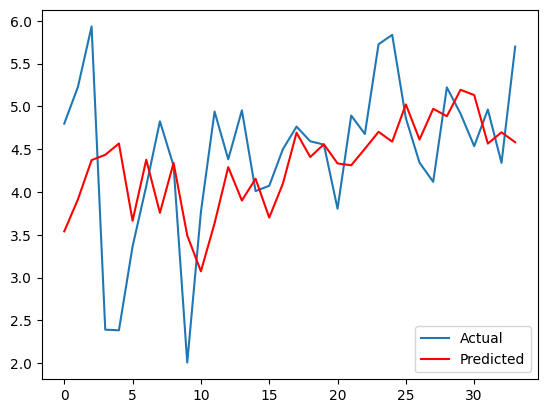

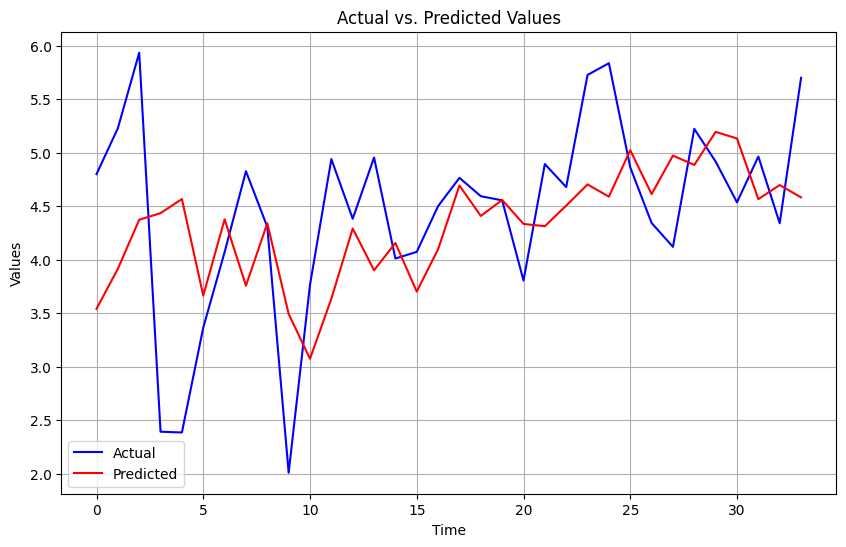

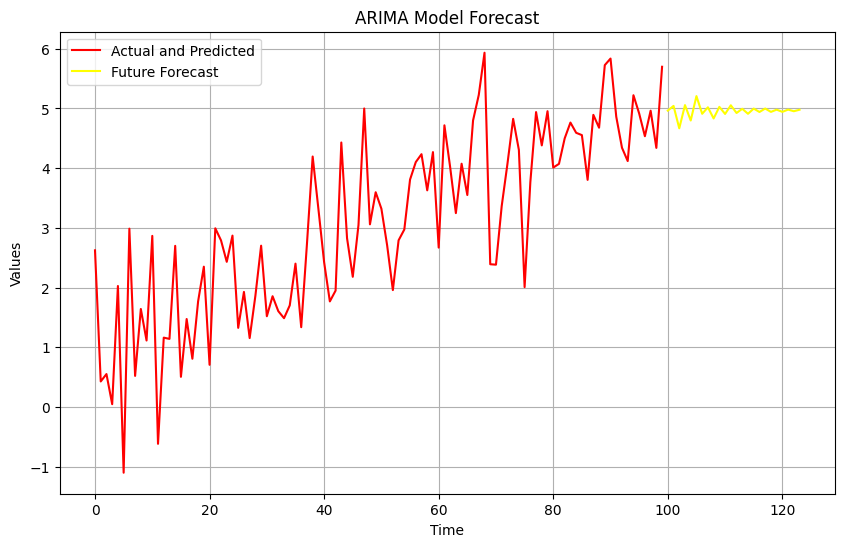

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt

# Example data
np.random.seed(1)
data = np.random.randn(100) + np.linspace(1, 5, 100)
modelfor = pd.DataFrame(data, columns=['Dom_LF'])

# Split the dataset
X = modelfor['Dom_LF'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = []

# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100

# Calculate accuracy
accuracy = 100 - mape

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MAPE: {mape:.3f}')
print(f'Test Accuracy: {accuracy:.3f}%')

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

# Fit the ARIMA model on the entire dataset
model = ARIMA(X, order=(5,1,0))
model_fit = model.fit()
# Plot actual versus predicted values
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
# Make predictions for the next 24 months (2 years) beyond the existing data
future_steps = 24
future_forecast = model_fit.forecast(steps=future_steps)

# Plot the actual and predicted values along with future forecasts
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(X)), X, label='Actual and Predicted', color='red')  # Plot actual and predicted values in red
plt.plot(np.arange(len(X), len(X) + len(future_forecast)), future_forecast, color='yellow', label='Future Forecast')  # Plot future forecast in yellow
plt.title('ARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF,time
date,,,,,,,,,,,,,,,,,,
2003-01-01,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20,0.041667
2003-02-01,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31,0.125000
2003-03-01,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12,0.208333
2003-04-01,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02,0.291667
2003-05-01,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,2023,5,"71,423,653","10,358,666","81,782,319","667,331","71,924","739,255","66,743,565","26,805,432","93,548,998","77,821,407","31,950,687","109,772,094",85.77,83.90,85.22,20.375000
2023-06-01,2023,6,"72,482,621","11,544,505","84,027,126","661,293","75,279","736,572","68,789,127","29,883,465","98,672,591","78,058,358","33,410,671","111,469,028",88.13,89.44,88.52,20.458333
2023-07-01,2023,7,"75,378,157","12,432,615","87,810,772","684,939","79,738","764,677","72,267,904","31,376,000","103,643,904","81,986,010","35,326,191","117,312,202",88.15,88.82,88.35,20.541667


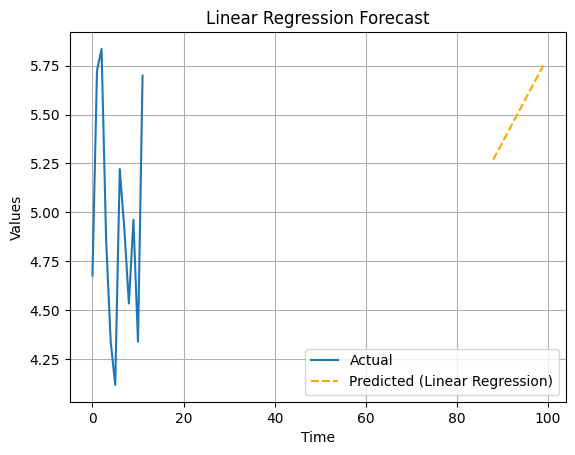

Linear Regression Test RMSE: 0.827
Linear Regression Test MAE: 0.723
Linear Regression Test MAPE: 15.638
Linear Regression Test Accuracy: 84.362%


In [ ]:
from sklearn.linear_model import LinearRegression

# Function to perform linear regression forecasting
def linear_regression_forecast(train, test, future_steps):
    # Reshape the data for Linear Regression
    X_train = np.arange(len(train)).reshape(-1, 1)
    X_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)

    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, train)

    # Predict for the test set and future steps
    test_predictions = model.predict(X_test)
    future_predictions = model.predict(np.arange(len(train), len(train) + future_steps).reshape(-1, 1))

    return test_predictions, future_predictions

# Forecast using Linear Regression
lr_test_predictions, lr_future_predictions = linear_regression_forecast(X, forecast, future_steps)

# Plot Linear Regression forecasts against actual outcomes
plt.plot(X[-future_steps:], label='Actual')
plt.plot(np.arange(len(X) - future_steps, len(X)), lr_test_predictions, color='orange', linestyle='--', label='Predicted (Linear Regression)')
plt.legend()
plt.title('Linear Regression Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Calculate test metrics for Linear Regression
lr_test_rmse = sqrt(mean_squared_error(X[-future_steps:], lr_test_predictions))
lr_test_mae = mean_absolute_error(X[-future_steps:], lr_test_predictions)
lr_test_mape = np.mean(np.abs((X[-future_steps:] - lr_test_predictions) / X[-future_steps:])) * 100
lr_test_accuracy = 100 - lr_test_mape

print(f'Linear Regression Test RMSE: {lr_test_rmse:.3f}')
print(f'Linear Regression Test MAE: {lr_test_mae:.3f}')
print(f'Linear Regression Test MAPE: {lr_test_mape:.3f}')
print(f'Linear Regression Test Accuracy: {lr_test_accuracy:.3f}%')


Epoch 1/100
3/3 [==============================] - 3s 16ms/step - loss: 0.3939
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 0.3758
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 0.3580
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.3419
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 0.3268
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 0.3122
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 0.2983
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 0.2844
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2709
Epoch 10/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2576
Epoch 11/100
3/3 [==============================] - 0s 11ms/step - loss: 0.2434
Epoch 12/100
3/3 [==============================] - 0s 17ms/step - loss: 0.2297
Epoch 13/100
3/3 [==============================] - 0

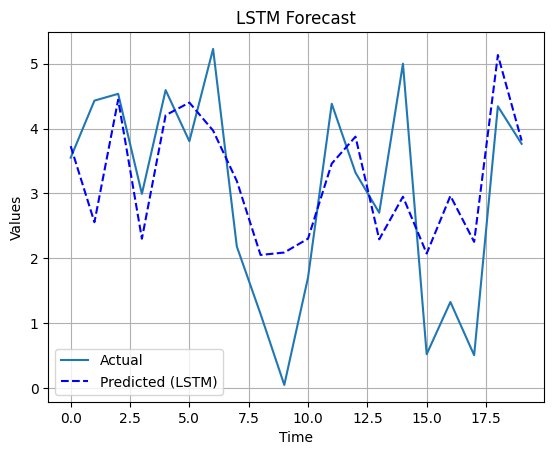

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Reshape data for LSTM
def reshape_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:(i+n_steps)])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Prepare data
n_steps = 3  # Define number of time steps
X_lstm, y_lstm = reshape_data(X_scaled, n_steps)
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
lstm_predictions_scaled = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled).flatten()

# Evaluate performance
lstm_test_rmse = sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), lstm_predictions))
lstm_test_mae = mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)), lstm_predictions)
lstm_test_mape = np.mean(np.abs((scaler.inverse_transform(y_test.reshape(-1, 1)) - lstm_predictions) / scaler.inverse_transform(y_test.reshape(-1, 1)))) * 100
lstm_test_accuracy = 100 - lstm_test_mape

print(f'LSTM Test RMSE: {lstm_test_rmse:.3f}')
print(f'LSTM Test MAE: {lstm_test_mae:.3f}')
print(f'LSTM Test MAPE: {lstm_test_mape:.3f}')
print(f'LSTM Test Accuracy: {lstm_test_accuracy:.3f}%')

# Plot LSTM forecasts against actual outcomes
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(lstm_predictions, color='blue', linestyle='--', label='Predicted (LSTM)')
plt.legend()
plt.title('LSTM Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()


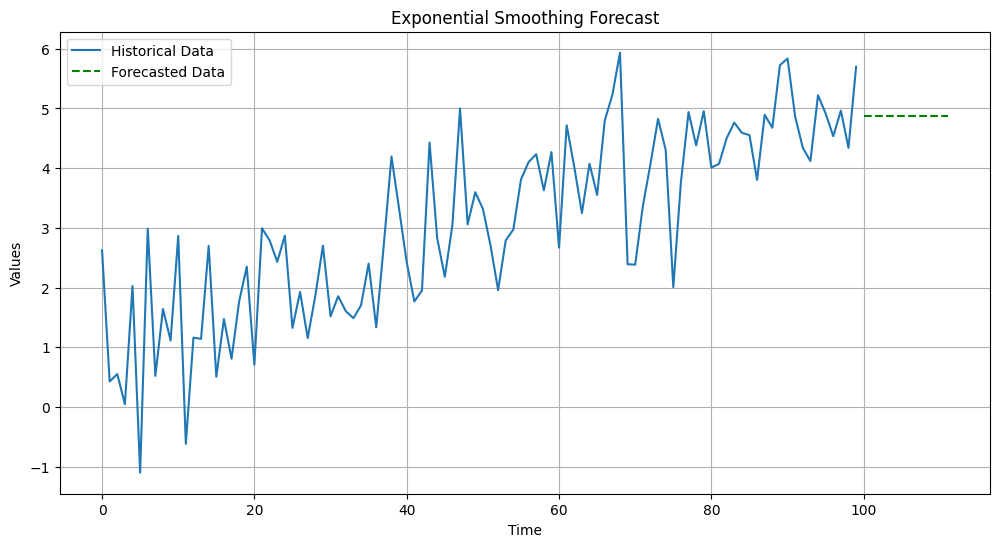

Moving Average Test RMSE: 0.723
Moving Average Test MAE: 0.561
Moving Average Test MAPE: 25.782
Moving Average Test Accuracy: 74.218%


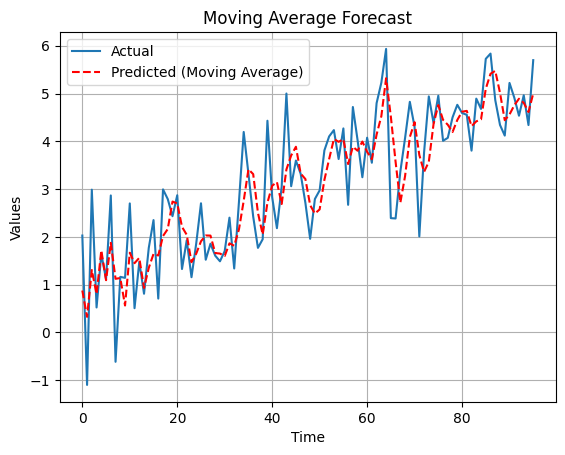

In [ ]:
# Install the required packages
!pip install statsmodels

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example data (replace this with your actual data loading/preprocessing steps)
np.random.seed(1)
data = np.random.randn(100) + np.linspace(1, 5, 100)
df = pd.DataFrame(data, columns=['Dom_LF'])
# Selecting the target column for time series analysis
X = df['Dom_LF'].values

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).flatten()

# Fit the Exponential Smoothing model on the entire dataset
model = ExponentialSmoothing(X_scaled)
model_fit = model.fit()

# Forecast the next 12 months
future_steps = 12  # Adjust the number of months you want to forecast
forecast_scaled = model_fit.forecast(steps=future_steps)

# Inverse scaling for the forecasted values
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# Plot the historical data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(X, label='Historical Data')
plt.plot(np.arange(len(X), len(X) + future_steps), forecast, color='green', linestyle='--', label='Forecasted Data')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculate test metrics
test_rmse = sqrt(mean_squared_error(X[-future_steps:], forecast))
test_mae = mean_absolute_error(X[-future_steps:], forecast)
test_mape = np.mean(np.abs((X[-future_steps:] - forecast) / X[-future_steps:])) * 100
test_accuracy = 100 - test_mape


# Moving Average Forecast

# Define the moving average function
def moving_average(data, window_size):
    moving_avg = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i+window_size]
        window_avg = np.mean(window)
        moving_avg.append(window_avg)
    return np.array(moving_avg)

# Define window size for the moving average
window_size = 3

# Calculate moving average
ma_predictions = moving_average(X[-(len(X) - window_size + 1):], window_size)  # Adjusted the slicing for X

# Ensure predictions and actual data are of the same length
X_test_ma = X[-len(ma_predictions):]

# Evaluate performance
ma_test_rmse = sqrt(mean_squared_error(X_test_ma, ma_predictions))
ma_test_mae = mean_absolute_error(X_test_ma, ma_predictions)
ma_test_mape = np.mean(np.abs((X_test_ma - ma_predictions) / X_test_ma)) * 100
ma_test_accuracy = 100 - ma_test_mape

print(f'Moving Average Test RMSE: {ma_test_rmse:.3f}')
print(f'Moving Average Test MAE: {ma_test_mae:.3f}')
print(f'Moving Average Test MAPE: {ma_test_mape:.3f}')
print(f'Moving Average Test Accuracy: {ma_test_accuracy:.3f}%')

# Plot moving average forecasts against actual outcomes
plt.plot(X_test_ma, label='Actual')
plt.plot(ma_predictions, color='red', linestyle='--', label='Predicted (Moving Average)')
plt.legend()
plt.title('Moving Average Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()


Best seasonal order: (1, 1, 1, 12)


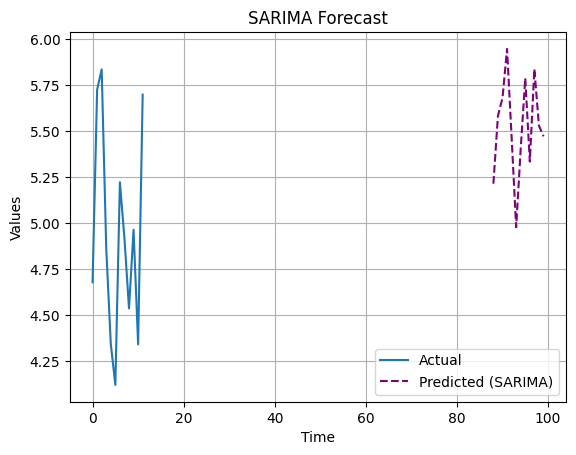

SARIMA Test RMSE: 0.773
SARIMA Test MAE: 0.671
SARIMA Test MAPE: 14.464
SARIMA Test Accuracy: 85.536%


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools  # Add this import statement

# Function to perform SARIMA forecasting
def sarima_forecast(train, test, seasonal_order, order):
    # Fit SARIMA model
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)

    # Forecast the test set
    sarima_predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

    # Forecast future steps
    future_forecast = model_fit.forecast(steps=future_steps)

    return sarima_predictions, future_forecast

# Define SARIMA hyperparameters
p = d = q = range(0, 2) # range for p,d,q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Seasonal orders for SARIMA
order = (1, 1, 1) # Order for SARIMA (you can adjust this based on model diagnostics)

# Selecting the best seasonal order (you can skip this step if you already have a fixed seasonal order)
best_aic = float("inf")
for param in seasonal_pdq:
    try:
        sarima_pred, _ = sarima_forecast(X, forecast, seasonal_order=param, order=order)
        current_aic = SARIMAX(X, order=order, seasonal_order=param, enforce_stationarity=False, enforce_invertibility=False).fit(disp=False).aic
        if current_aic < best_aic:
            best_aic = current_aic
            best_seasonal_order = param
    except:
        continue

print("Best seasonal order:", best_seasonal_order)

# Forecast using SARIMA
sarima_test_predictions, sarima_future_predictions = sarima_forecast(X, forecast, seasonal_order=best_seasonal_order, order=order)

# Plot SARIMA forecasts against actual outcomes
plt.plot(X[-future_steps:], label='Actual')
plt.plot(np.arange(len(X) - future_steps, len(X)), sarima_test_predictions, color='purple', linestyle='--', label='Predicted (SARIMA)')
plt.legend()
plt.title('SARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Calculate test metrics for SARIMA
sarima_test_rmse = sqrt(mean_squared_error(X[-future_steps:], sarima_test_predictions))
sarima_test_mae = mean_absolute_error(X[-future_steps:], sarima_test_predictions)
sarima_test_mape = np.mean(np.abs((X[-future_steps:] - sarima_test_predictions) / X[-future_steps:])) * 100
sarima_test_accuracy = 100 - sarima_test_mape

print(f'SARIMA Test RMSE: {sarima_test_rmse:.3f}')
print(f'SARIMA Test MAE: {sarima_test_mae:.3f}')
print(f'SARIMA Test MAPE: {sarima_test_mape:.3f}')
print(f'SARIMA Test Accuracy: {sarima_test_accuracy:.3f}%')


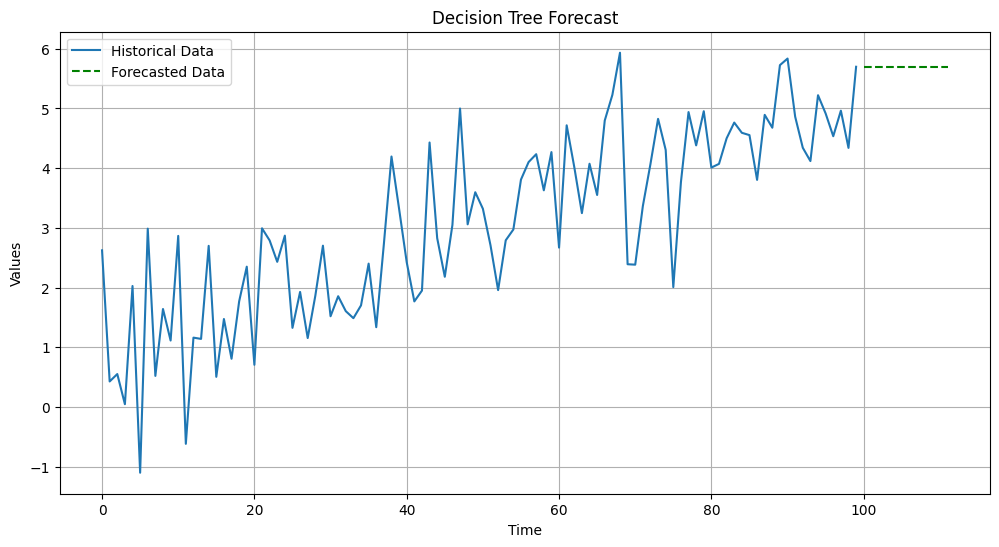

Test RMSE: 0.943
Test MAE: 0.789
Test MAPE: 17.353
Test Accuracy: 82.647%


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fit the Decision Tree model on the entire dataset
dt_model = DecisionTreeRegressor()
dt_model.fit(np.arange(len(X)).reshape(-1, 1), X)

# Forecast the next 12 months
future_steps = 12  # Adjust the number of months you want to forecast
forecast = dt_model.predict(np.arange(len(X), len(X) + future_steps).reshape(-1, 1))

# Plot the historical data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(X, label='Historical Data')
plt.plot(np.arange(len(X), len(X) + future_steps), forecast, color='green', linestyle='--', label='Forecasted Data')
plt.title('Decision Tree Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculate test metrics
test_rmse = sqrt(mean_squared_error(X[-future_steps:], forecast))
test_mae = mean_absolute_error(X[-future_steps:], forecast)
test_mape = np.mean(np.abs((X[-future_steps:] - forecast) / X[-future_steps:])) * 100
test_accuracy = 100 - test_mape

print(f'Test RMSE: {test_rmse:.3f}')
print(f'Test MAE: {test_mae:.3f}')
print(f'Test MAPE: {test_mape:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}%')


In [ ]:
df.columns



Index(['Dom_LF'], dtype='object')

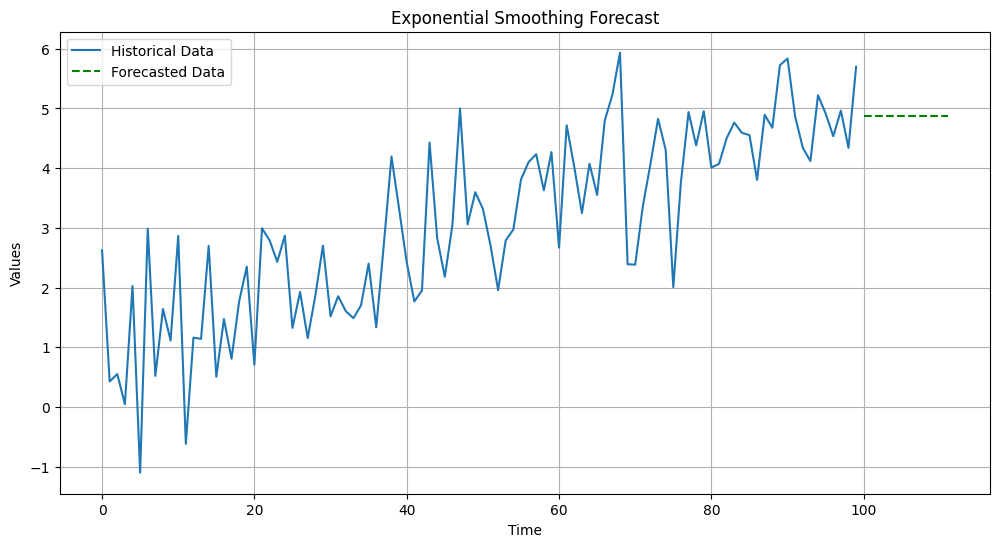

In [ ]:
# Install the required packages
!pip install statsmodels

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing



# Assuming the column containing the time series data is named 'Dom_LF'
X = df['Dom_LF'].values

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).flatten()

# Fit the Exponential Smoothing model on the entire dataset
model = ExponentialSmoothing(X_scaled)
model_fit = model.fit()

# Forecast the next 12 months
future_steps = 12  # Adjust the number of months you want to forecast
forecast_scaled = model_fit.forecast(steps=future_steps)

# Inverse scaling for the forecasted values
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# Plot the historical data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(X, label='Historical Data')
plt.plot(np.arange(len(X), len(X) + future_steps), forecast, color='green', linestyle='--', label='Forecasted Data')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()



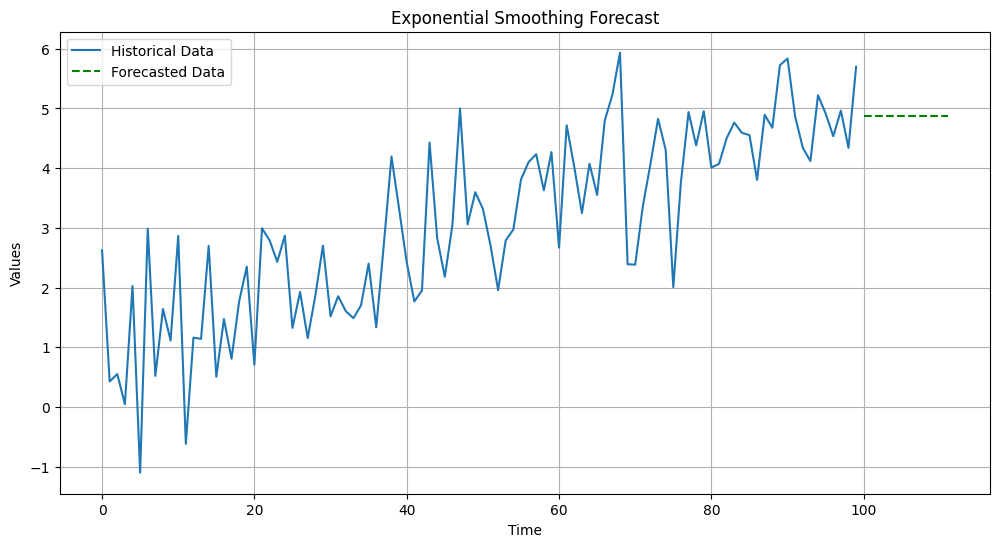

Test RMSE: 0.559
Test MAE: 0.457
Test MAPE: 9.163
Test Accuracy: 90.837%
Moving Average Test RMSE: 0.723
Moving Average Test MAE: 0.561
Moving Average Test MAPE: 25.782
Moving Average Test Accuracy: 74.218%


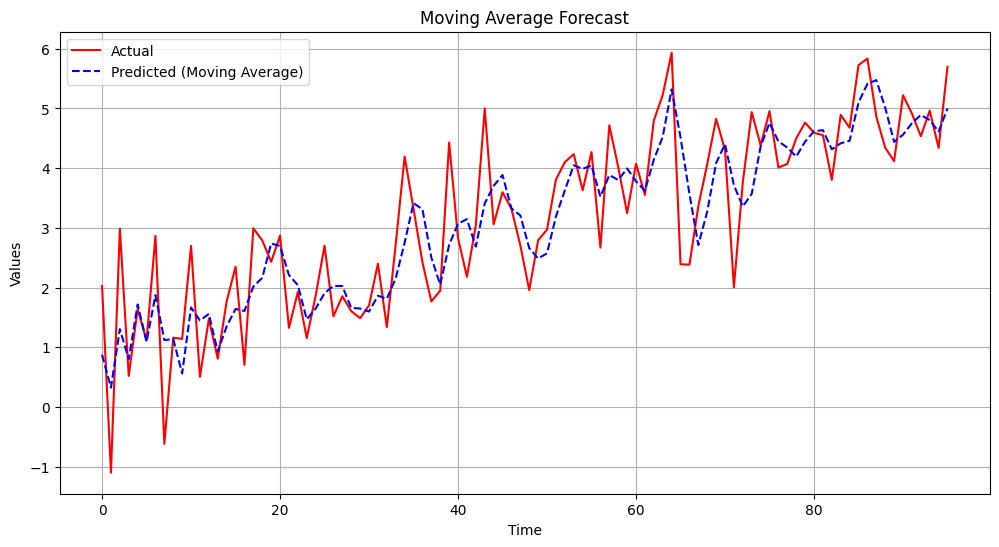

In [ ]:
# Install the required packages
!pip install statsmodels

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example data (replace this with your actual data loading/preprocessing steps)
np.random.seed(1)
data = np.random.randn(100) + np.linspace(1, 5, 100)
df = pd.DataFrame(data, columns=['Dom_LF'])
# Selecting the target column for time series analysis
X = df['Dom_LF'].values

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).flatten()

# Fit the Exponential Smoothing model on the entire dataset
model = ExponentialSmoothing(X_scaled)
model_fit = model.fit()

# Forecast the next 12 months
future_steps = 12  # Adjust the number of months you want to forecast
forecast_scaled = model_fit.forecast(steps=future_steps)

# Inverse scaling for the forecasted values
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# Plot the historical data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(X, label='Historical Data')
plt.plot(np.arange(len(X), len(X) + future_steps), forecast, color='green', linestyle='--', label='Forecasted Data')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculate test metrics
test_rmse = sqrt(mean_squared_error(X[-future_steps:], forecast))
test_mae = mean_absolute_error(X[-future_steps:], forecast)
test_mape = np.mean(np.abs((X[-future_steps:] - forecast) / X[-future_steps:])) * 100
test_accuracy = 100 - test_mape

print(f'Test RMSE: {test_rmse:.3f}')
print(f'Test MAE: {test_mae:.3f}')
print(f'Test MAPE: {test_mape:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}%')

# Moving Average Forecast

# Define the moving average function
def moving_average(data, window_size):
    moving_avg = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i+window_size]
        window_avg = np.mean(window)
        moving_avg.append(window_avg)
    return np.array(moving_avg)

# Define window size for the moving average
window_size = 3

# Calculate moving average
ma_predictions = moving_average(X[-(len(X) - window_size + 1):], window_size)  # Adjusted the slicing for X

# Ensure predictions and actual data are of the same length
X_test_ma = X[-len(ma_predictions):]

# Evaluate performance
ma_test_rmse = sqrt(mean_squared_error(X_test_ma, ma_predictions))
ma_test_mae = mean_absolute_error(X_test_ma, ma_predictions)
ma_test_mape = np.mean(np.abs((X_test_ma - ma_predictions) / X_test_ma)) * 100
ma_test_accuracy = 100 - ma_test_mape

print(f'Moving Average Test RMSE: {ma_test_rmse:.3f}')
print(f'Moving Average Test MAE: {ma_test_mae:.3f}')
print(f'Moving Average Test MAPE: {ma_test_mape:.3f}')
print(f'Moving Average Test Accuracy: {ma_test_accuracy:.3f}%')

# Plot moving average forecasts against actual outcomes
plt.figure(figsize=(12, 6))
plt.plot(X_test_ma, label='Actual', color='red')
plt.plot(ma_predictions, color='blue', linestyle='--', label='Predicted (Moving Average)')
plt.title('Moving Average Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
